# 0. Install LIB

In [310]:
!pip install mediapipe opencv-python pandas scikit-learn

In [314]:
import mediapipe as mp 
import cv2 

In [315]:
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic

# 0. Estimasi Pose

In [316]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.flip(frame,1)
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        results = holistic.process(image)

        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [273]:
results.left_hand_landmarks.landmark[0].visibility

0.0

# 1. Estimasi Pose to CSV

In [274]:
import csv
import os
import numpy as np

In [275]:
num_coords = len(results.pose_landmarks.landmark)+len(results.left_hand_landmarks.landmark)+len(results.left_hand_landmarks.landmark)
num_coords

75

In [276]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [277]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [278]:
with open('b.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [279]:
class_name = "Hello"

In [280]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.flip(frame,1)
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        results = holistic.process(image)
        
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        try:
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            right = results.right_hand_landmarks.landmark
            right_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right]).flatten())
            
            left = results.left_hand_landmarks.landmark
            left_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left]).flatten())
            
            row = pose_row+right_row+left_row
             
            row.insert(0, class_name)
            
            with open('b.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 2. Train Custom Model Using Scikit Learn

# 2.1 Read Data CSV

In [297]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [298]:
df = pd.read_csv('body_language.csv')

In [299]:
df

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z73,v73,x74,y74,z74,v74,x75,y75,z75,v75
0,Hello,0.450138,0.490304,-0.931383,0.998435,0.481263,0.416973,-0.855517,0.996438,0.502990,...,-0.073113,0.0,0.854539,0.634442,-0.077774,0.0,0.835679,0.630117,-0.080073,0.0
1,Hello,0.449512,0.504366,-0.712235,0.998591,0.480105,0.435328,-0.637064,0.996793,0.500602,...,-0.058250,0.0,0.845058,0.583167,-0.064388,0.0,0.832602,0.558525,-0.067794,0.0
2,Hello,0.447545,0.507738,-0.798327,0.998729,0.477500,0.439540,-0.728050,0.997109,0.497020,...,-0.055236,0.0,0.832746,0.533821,-0.060920,0.0,0.823143,0.504086,-0.064097,0.0
3,Hello,0.446820,0.516635,-0.801073,0.998852,0.473171,0.451751,-0.734193,0.997390,0.491791,...,-0.044558,0.0,0.801221,0.391608,-0.047203,0.0,0.796602,0.358024,-0.049484,0.0
4,Hello,0.446021,0.532238,-0.777598,0.998964,0.470365,0.465622,-0.712891,0.997644,0.488610,...,-0.047676,0.0,0.782509,0.376852,-0.053320,0.0,0.776969,0.340171,-0.056983,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Call,0.464604,0.489546,-1.310965,0.999814,0.501497,0.418883,-1.240739,0.999674,0.521618,...,-0.052720,0.0,0.559885,0.647024,-0.057047,0.0,0.534192,0.662215,-0.061150,0.0
362,Call,0.463691,0.490537,-1.414248,0.999818,0.500916,0.419768,-1.345480,0.999679,0.521244,...,-0.047026,0.0,0.562873,0.647956,-0.050012,0.0,0.538365,0.662504,-0.053412,0.0
363,Call,0.463048,0.489476,-1.287778,0.999826,0.501019,0.418445,-1.203736,0.999695,0.521329,...,-0.030087,0.0,0.584270,0.688778,-0.031392,0.0,0.558937,0.700559,-0.032149,0.0
364,Call,0.462554,0.485852,-1.286040,0.999829,0.501139,0.410170,-1.203449,0.999705,0.521433,...,-0.025421,0.0,0.603775,0.716970,-0.024060,0.0,0.580728,0.725420,-0.023388,0.0


In [287]:
df[df['class']=='Love']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z73,v73,x74,y74,z74,v74,x75,y75,z75,v75
66,Love,0.473345,0.397595,-0.481886,0.999777,0.494826,0.340058,-0.397876,0.999497,0.508643,...,-0.044992,0.0,0.527955,0.531200,-0.045575,0.0,0.509282,0.542004,-0.045885,0.0
67,Love,0.473324,0.401951,-0.645409,0.999797,0.494118,0.343811,-0.567662,0.999539,0.507640,...,-0.034563,0.0,0.523608,0.480134,-0.036830,0.0,0.505695,0.488865,-0.038057,0.0
68,Love,0.473711,0.405303,-0.599223,0.999816,0.494090,0.346809,-0.520380,0.999579,0.507400,...,-0.036336,0.0,0.522103,0.475456,-0.039894,0.0,0.501807,0.484468,-0.041742,0.0
69,Love,0.473519,0.404996,-0.608474,0.999833,0.493098,0.346692,-0.525842,0.999617,0.506142,...,-0.032873,0.0,0.520702,0.472527,-0.035243,0.0,0.501996,0.486701,-0.036658,0.0
70,Love,0.472287,0.414464,-0.607788,0.999848,0.492663,0.356301,-0.535168,0.999651,0.505669,...,-0.023769,0.0,0.529017,0.417141,-0.023235,0.0,0.520009,0.440555,-0.021768,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Love,0.472313,0.399085,-0.981978,0.999980,0.501904,0.322495,-0.927036,0.999958,0.519464,...,-0.140456,0.0,0.626776,0.773302,-0.130471,0.0,0.651630,0.787599,-0.121902,0.0
205,Love,0.472310,0.400220,-0.991811,0.999980,0.502016,0.325177,-0.934477,0.999959,0.519527,...,-0.108911,0.0,0.611784,0.740395,-0.102055,0.0,0.623952,0.753408,-0.094114,0.0
206,Love,0.472367,0.403317,-1.215570,0.999980,0.502303,0.328933,-1.149151,0.999959,0.519785,...,-0.102215,0.0,0.614358,0.733326,-0.095281,0.0,0.623779,0.742325,-0.088016,0.0
207,Love,0.472434,0.402797,-1.153027,0.999979,0.502419,0.328765,-1.104953,0.999960,0.519843,...,-0.101911,0.0,0.611051,0.728347,-0.094294,0.0,0.617723,0.737366,-0.087208,0.0


In [300]:
X = df.drop('class', axis=1)
y = df['class']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [290]:
y_test

64     Hello
199     Love
299     Good
310     Good
7      Hello
       ...  
74      Love
95      Love
31     Hello
129     Love
345     Good
Name: class, Length: 110, dtype: object

# 2.2 Train Machine Learning Classification Model

In [302]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [303]:
pipelines = {
    'dt':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
}

In [304]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

DT: 0.964481 (0.020446)
optimized_parameters {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

RF: 0.994536 (0.007728)
optimized_parameters {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}



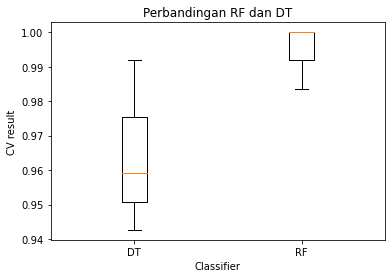

In [305]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


names = []
results = []
model = []
model.append(('DT',DecisionTreeClassifier()))
model.append(('RF',RandomForestClassifier()))

for name, model in model:  
  kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  optimized_parameters = model.get_params(deep=True)
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
  print('optimized_parameters',optimized_parameters)
  print()

pyplot.title( 'Perbandingan RF dan DT')
pyplot.xlabel('Classifier')
pyplot.ylabel('CV result')
pyplot.boxplot(results, labels=names)
pyplot.show()

   CrossValMeans  CrossValerrors     Algorithm
0       0.898438        0.054688  DecisionTree
1       0.988281        0.003906  RandomForest


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


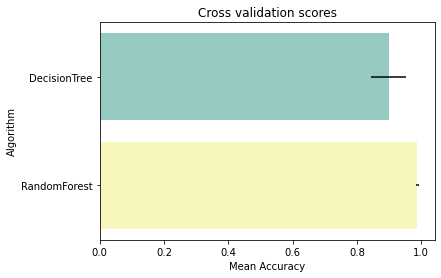

In [296]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


kfold = StratifiedKFold(n_splits=2)

# Modeling step Test differents algorithms 
import seaborn as sns
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","RandomForest"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores") 
print(cv_res)

# 2.3 Evaluate and Serialize Model 

In [48]:
from sklearn.metrics import accuracy_score
import pickle 

In [318]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

dt 0.990909090909091
rf 1.0


In [52]:
fit_models['rf'].predict(X_test)

array(['Hello', 'Love', 'Good', 'Good', 'Hello', 'Hello', 'Love', 'Love',
       'Good', 'Love', 'Love', 'Love', 'Bad', 'Love', 'Love', 'Good',
       'Love', 'Love', 'Love', 'Love', 'Good', 'Hello', 'Hello', 'Love',
       'Hello', 'Love', 'Love', 'Bad', 'Bad', 'Love', 'Call', 'Hello',
       'Bad', 'Good', 'Bad', 'Bad', 'Hello', 'Love', 'Love', 'Hello',
       'Love', 'Bad', 'Love', 'Good', 'Good', 'Bad', 'Love', 'Hello',
       'Love', 'Love', 'Love', 'Love', 'Hello', 'Love', 'Good', 'Love',
       'Bad', 'Call', 'Bad', 'Love', 'Bad', 'Love', 'Bad', 'Love', 'Love',
       'Good', 'Love', 'Bad', 'Love', 'Hello', 'Hello', 'Call', 'Bad',
       'Bad', 'Good', 'Good', 'Hello', 'Love', 'Good', 'Love', 'Love',
       'Bad', 'Love', 'Good', 'Love', 'Love', 'Good', 'Good', 'Bad',
       'Love', 'Love', 'Hello', 'Good', 'Love', 'Hello', 'Love', 'Hello',
       'Bad', 'Love', 'Hello', 'Love', 'Love', 'Call', 'Good', 'Bad',
       'Love', 'Love', 'Hello', 'Love', 'Good'], dtype=object)

In [53]:
y_test

64     Hello
199     Love
299     Good
310     Good
7      Hello
       ...  
74      Love
95      Love
31     Hello
129     Love
345     Good
Name: class, Length: 110, dtype: object

In [18]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# 3. Real Time

In [327]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [328]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [329]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.flip(frame,1)

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        results = holistic.process(image)

        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

        try:
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            right = results.right_hand_landmarks.landmark
            right_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right]).flatten())
            
            left = results.left_hand_landmarks.landmark
            left_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left]).flatten())
            
            row = pose_row+right_row+left_row

            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Love [0.13 0.03 0.1  0.19 0.55]
Love [0.1  0.03 0.08 0.22 0.57]
Love [0.04 0.   0.11 0.23 0.62]
Love [0.05 0.03 0.06 0.25 0.61]
Love [0.04 0.02 0.06 0.29 0.59]
Love [0.05 0.06 0.07 0.29 0.53]
Love [0.08 0.05 0.1  0.37 0.4 ]
Love [0.08 0.03 0.12 0.37 0.4 ]
Hello [0.07 0.04 0.11 0.41 0.37]
Hello [0.08 0.03 0.12 0.41 0.36]
Hello [0.09 0.05 0.11 0.39 0.36]
Love [0.08 0.05 0.15 0.35 0.37]
Love [0.09 0.05 0.13 0.35 0.38]
Hello [0.09 0.06 0.12 0.37 0.36]
Hello [0.09 0.05 0.16 0.37 0.33]
Hello [0.08 0.06 0.13 0.39 0.34]
Hello [0.09 0.06 0.13 0.38 0.34]
Hello [0.09 0.05 0.14 0.37 0.35]
Hello [0.09 0.05 0.13 0.39 0.34]
Hello [0.09 0.05 0.16 0.39 0.31]
Hello [0.09 0.05 0.17 0.38 0.31]
Hello [0.09 0.05 0.16 0.37 0.33]
Hello [0.09 0.05 0.16 0.37 0.33]
Hello [0.08 0.05 0.19 0.38 0.3 ]
Hello [0.09 0.05 0.19 0.38 0.29]
Hello [0.09 0.05 0.19 0.38 0.29]
Hello [0.09 0.05 0.21 0.37 0.28]
Hello [0.09 0.05 0.18 0.38 0.3 ]
Hello [0.09 0.05 0.19 0.37 0.3 ]
Hello [0.09 0.05 0.17 0.39 0.3 ]
Hello [0.09 0.05 0.1